# TASK 1 - Prediction using Supervised Machine Learning

#### Predicting the percentage score of a student based on the number of study hours using Simple Linear Regression Model as it involves only two variables Hours and Scores

# GRIPAPRIL21

## Author - Rasika Bose


## Step 1 - Importing the standard ML Libraries

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm

## Step 2 - Reading data from the link provided 

In [70]:
data = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")
data.head(10) #Used to display the first 10 observations of the dataset

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Step 3 - Data visualization using scatter plot

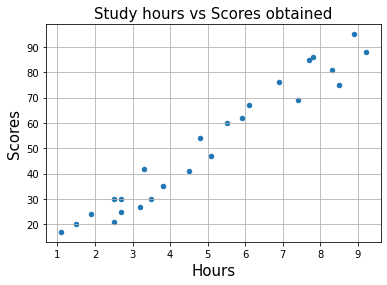

In [12]:
data.plot(kind='scatter',x='Hours',y='Scores')
plt.title("Study hours vs Scores obtained",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.xlabel("Hours",fontsize=15)
plt.grid(True)
plt.show()

#### From the scater plot we can clearly see that there is a positive linear relation between the number of hours studied and score 

#### obtained. Thus we build a Linear Regression Model using ML.

## Step 4 - Dividing the data into attributes and labels (Data preparation)

### Here attributes (inputs) are the no. of study hours and labels (outputs) are scores of students

In [104]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 
print("Values of x",x)
print("Values of y",y)

Values of x [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
Values of y [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


## Step 5 - Splitting the data into training and test sets

### Using Scikit-Learn's built-in train_test_split() method:

In [105]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.3, random_state=0) 

## Step 6 - Training Simple Linear Regression Model

In [106]:
lm =linear_model.LinearRegression()
model = lm.fit(x_train,y_train)
print("Intercept: \n",model.intercept_)
print("Coefficient: \n",model.coef_)
print("Training complete")


Intercept: 
 2.370815382341881
Coefficient: 
 [9.78856669]
Training complete


## Step 7 - Visualization of the line of fit or the Regression Line

### The line of regression is given by :-   y = coefficient * x + Intercept

### From above it will be 

### y = 9.78856669 x + 2.370815382341881

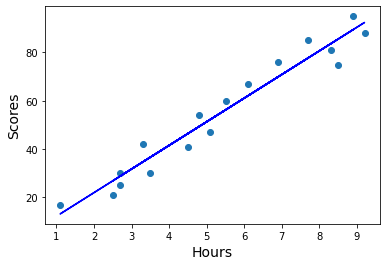

In [107]:
#Visualizing the line of Regression
plt.scatter(x_train,y_train)
plt.plot(x_train,lm.predict(x_train),color='blue')
plt.xlabel("Hours",fontsize=14)
plt.ylabel("Scores",fontsize=14)
plt.show()

## Step 8 - Predicting the score for studying 9.25 hours/day

In [109]:
print("No of hours = 9.25")
pred_val=lm.predict([[9.25]])
print("Predicted score = ",format(pred_val[0]))

No of hours = 9.25
Predicted score =  92.91505723477056


## Step 9 - Predicting and Testing

In [97]:
print(x_test) # Testing data - In Hours
y_pred = model.predict(x_test) # Predicting the scores
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


## Step 10 - Evaluating the model

### The final step for this algorithm will be the evaluation of the model.

### This step is particularly important to compare how well different algorithms perform on a particular dataset. 

### We used the R-square metric here for evaluation.

In [103]:
x=sm.add_constant(x)
mode=sm.OLS(y,x).fit()
predictions=mode.predict(x)
print(mode.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           9.13e-17
Time:                        03:58:44   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.3

### The R-Square value obtained is 0.953 which states that 95.3 % variation in the dataset is explained by the 

### model we fit that is y = 9.78856669 x + 2.370815382341881